# SIMPLE ANIMATION
## (1) 2 visual parameters 
## (2) simple motion

In [1]:
pwd

'/Users/Tomer/Documents/Columbia/2016-2017/Spring/sonification/final_project_animation'

In [2]:
from matplotlib import cm
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation


%matplotlib auto
%matplotlib inline

Using matplotlib backend: MacOSX


## (2) another example:  motion of a slider (one parameter)
### (Geysers injection data)... 

In [3]:
##TOMER

import pandas as pd
import requests
import csv
from io import StringIO

#dates + station are ints
#product is string

def create_df(begin_date,end_date,station,product,start_index,end_index):
    parameters = {"begin_date": begin_date , "end_date": end_date , "station": station , "product": product, "units": "english", "time_zone": "gmt", "format": "csv","application" : "NOS.COOPS.TAC.WL", "datum": "MLLW"}
    url_small = 'https://tidesandcurrents.noaa.gov/api/datagetter'
    r_test = requests.get(url_small,params=parameters)
    water_level_data = pd.read_csv(StringIO(r_test.text))
    time = water_level_data.index
    p1 = water_level_data[water_level_data.columns[1]][start_index:end_index]
    #convert to numpy
    p1 = p1.as_matrix()
    return p1


begin_date = 20170401
end_date = 20170407
start_index = 1
end_index = 1500

station_sf = 9414290

p1_waterlevel = create_df(begin_date,end_date,station_sf,'water_level',start_index,end_index)
p1_watertemp = create_df(begin_date,end_date,station_sf,'water_temperature',start_index,end_index)
p1_airtemp = create_df(begin_date,end_date,station_sf,'air_temperature',start_index,end_index)

#station_sd = 9410170

station_mont = 9413450

p2_waterlevel = create_df(begin_date,end_date,station_mont,'water_level',start_index,end_index)
#becaus monterey has nan's
mask = np.isnan(p2_waterlevel)
p2_waterlevel[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), p2_waterlevel[~mask])

p2_watertemp = create_df(begin_date,end_date,station_mont,'water_temperature',start_index,end_index)
p2_airtemp = create_df(begin_date,end_date,station_mont,'air_temperature',start_index,end_index)

station_tx = 8771450

p3_waterlevel = create_df(begin_date,end_date,station_tx,'water_level',start_index,end_index)
p3_watertemp = create_df(begin_date,end_date,station_tx,'water_temperature',start_index,end_index)
p3_airtemp = create_df(begin_date,end_date,station_tx,'air_temperature',start_index,end_index)

station_fl = 8726607

p4_waterlevel = create_df(begin_date,end_date,station_fl,'water_level',start_index,end_index)
p4_watertemp = create_df(begin_date,end_date,station_fl,'water_temperature',start_index,end_index)
p4_airtemp = create_df(begin_date,end_date,station_fl,'air_temperature',start_index,end_index)


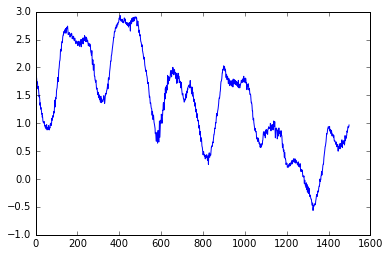

In [4]:
#graph of raw data

plt.plot(p3_waterlevel)


In [19]:
n_frames = len(p1_waterlevel)
print('num frames = ' + str(n_frames))
movie_dur = 30.0 # in seconds
print('movie_dur = ' + str(movie_dur))
frame_interval = movie_dur/n_frames
print('frame_interval = ' + str(frame_interval))
fps_ideal = 1./frame_interval
print('frames per sec = ' + str(fps_ideal))

num frames = 1499
movie_dur = 30.0
frame_interval = 0.0200133422281521
frames per sec = 49.96666666666667


In [13]:
# MAPPING THE PHYSICAL VALUES TO DOT PARAMETERS...

ind = len(p1_waterlevel) - 10

# =====================
# MAP parameter 1 TO position

def slider_posn(p1_val,p1):
    num_vals = 10
    p1_vec = np.linspace(np.min(p1),np.max(p1),num_vals)
    top = 0.8
    bot = 0.2
    posn_vec = np.linspace(bot,top,num_vals)
    posn_val = np.interp(p1_val,p1_vec,posn_vec)
    return posn_val

posn_1 = slider_posn(p1_waterlevel[ind],p1_waterlevel)
print('initial posn. val = ' + str(posn_1))

posn_2 = slider_posn(p2_waterlevel[ind],p2_waterlevel)
print('initial posn. val = ' + str(posn_2))

posn_3 = slider_posn(p3_waterlevel[ind],p3_waterlevel)
print('initial posn. val = ' + str(posn_3))

posn_4 = slider_posn(p4_waterlevel[ind],p4_waterlevel)
print('initial posn. val = ' + str(posn_4))



initial posn. val = 0.7887661141804789
initial posn. val = 0.7363850555368563
initial posn. val = 0.44504865483686323
initial posn. val = 0.5773755656108599


In [14]:
#attempt to map to color


def color_getter(p2_val,p2,color_map):
    num_vals = 10
    p2_vec = np.linspace(np.min(p2),np.max(p2),num_vals)
    cmap = plt.get_cmap(color_map)
    #cmap = cm.hot
    color_vec = np.linspace(0,1,num_vals)
    color_ind = np.interp(p2_val,p2_vec,color_vec)
    dot_col = cmap(color_ind)
    return dot_col


average_airtemp = (p1_airtemp + p2_airtemp + p3_airtemp + p4_airtemp)/4 

col_background = color_getter(average_airtemp[ind],average_airtemp,'Purples')

col_1 = color_getter(p1_watertemp[ind],p1_watertemp,'coolwarm')
col_2 = color_getter(p2_watertemp[ind],p2_watertemp,'coolwarm')
col_3 = color_getter(p3_watertemp[ind],p3_watertemp,'coolwarm')
col_4 = color_getter(p4_watertemp[ind],p4_watertemp,'coolwarm')

print('dot_col = ' + str(col_1) )
print('dot_col = ' + str(col_2) )
print('dot_col = ' + str(col_3) )
print('dot_col = ' + str(col_4) )



dot_col = (0.2298057, 0.298717966, 0.75368315299999999, 1.0)
dot_col = (0.2298057, 0.298717966, 0.75368315299999999, 1.0)
dot_col = (0.80496475882352947, 0.85166616055686273, 0.92616507443137253, 1.0)
dot_col = (0.60316206791764704, 0.73152747735294121, 0.99956527853725485, 1.0)


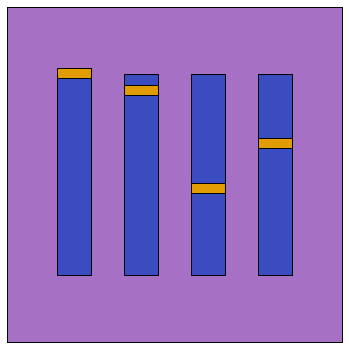

In [15]:
# ======================
# PLOT THE background 

fig1 = plt.figure(figsize=(6, 6))
ax = fig1.add_subplot(111, aspect='equal')

# (0) plot a filled square with a vertical slider bar in it...
# patches.Rectangle((x,y,lower left corner),width,height)

#background
background = ax.add_patch(patches.Rectangle((0.0, 0.0),1,1,facecolor='#a671c4',label='Average Air Temperature'))
#[1,1,0.9]



#rectangle1
rectangle_1 = patches.Rectangle((.15, .2),0.1,0.6,facecolor = col_1,label='Water Temperature')
ax.add_patch(rectangle_1) 

#levelbar1
levelbar_1 = patches.Rectangle((0.15, posn_1),0.1,0.03,facecolor = '#e09c00',label='Water Level' )
levelbar_1.set_y(posn_1)
ax.add_artist(levelbar_1)

#rectangle2
rectangle_2 = patches.Rectangle((.35, .2),0.1,0.6,facecolor = col_1)
ax.add_patch(rectangle_2) 

#levelbar2
levelbar_2 = patches.Rectangle((0.35, posn_2),0.1,0.03,facecolor = '#e09c00' ) 
levelbar_2.set_y(posn_2)
ax.add_artist(levelbar_2)

#rectangle3
rectangle_3 = patches.Rectangle((.55, .2),0.1,0.6,facecolor = col_1)
ax.add_patch(rectangle_3) 

#levelbar3
levelbar_3 = patches.Rectangle((0.55, posn_3),0.1,0.03,facecolor = '#e09c00' ) 
levelbar_3.set_y(posn_3)
ax.add_artist(levelbar_3)

#rectangle4
rectangle_4 = patches.Rectangle((.75, .2),0.1,0.6,facecolor = col_1)
ax.add_patch(rectangle_4) 

#levelbar4
levelbar_4 = patches.Rectangle((0.75, posn_4),0.1,0.03,facecolor = '#e09c00' ) 
levelbar_4.set_y(posn_4)
ax.add_artist(levelbar_4)


#plt.legend(handles=[background,rectangle_1,levelbar_1],bbox_to_anchor=(1.05, .65), loc=2, borderaxespad=0.1)

#ax.set_title('Sonification of CA, TX, and FL Water Level Data for April 1st to 7th, 2017')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('labeled_viz.png', bbox_inches='tight')

(0.0, 1.0, 0.0, 1.0)

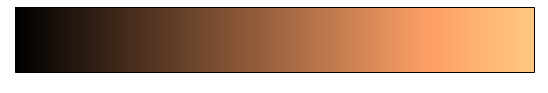

In [9]:
#color bar creation

a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="copper")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.axis('off')
#pl.savefig("colorbar.pdf")

In [10]:
# #these variables reference data which is a list of all the dataframes. data is global
# def init_new():
#     init_list = []
#     for i in range(0,len(data)):
#         print(data[i])
#         y_posn = slider_posn(data[i][0],data[i])
#         levelbar.set_y(y_posn)
#         ax1.add_artist(levelbar)
#         init_list.append(levelbar)
#     print(init_list)
#     return init_list

# def animate_new(i): # is this (i) needed for the animate function ? 
#     animate_list = []
#     for j in range(0,len(data)):
#         #print(data[j])
#         y_posn = slider_posn(data[j][i],data[j])
#         levelbar.set_y(y_posn)
#         ax1.add_artist(levelbar)
# -    #print(animate_list)
#     return animate_list

In [ ]:
# ANIMATE 

# flag to determine whether movie gets viewed (0) or recorded (1), not both. 
view_or_write = 1
# to save, you must first install ffmpeg (and then restart the notebook engine)
if view_or_write == 1:
    movie_name = 'water_levelcolors_FINAL_1500_30_vF.mp4'

# ===================================================
# initialize what will move in the animation

def init():
    #initialize background color
    col_background = []
    col_background = color_getter(p1_waterlevel[0],p1_waterlevel,'Purples')
    #set background
    background.set_color(col_background)
    
    #initialize slider color
    col_slider_1 = []
    col_slider_1 = color_getter(p1_waterlevel[0],p1_waterlevel,'copper')
    #initialize rectangle color
    col_bar_1 = []
    col_bar_1 = color_getter(p1_watertemp[0],p1_watertemp,'coolwarm')
    #initialize slider position
    y_posn_1 = slider_posn(p1_waterlevel[0],p1_waterlevel)
    #set stuff
    levelbar_1.set_y(y_posn_1)
    levelbar_1.set_color(col_slider_1)
    rectangle_1.set_color(col_bar_1)
    #add artist
    ax.add_artist(levelbar_1)
    
    ###2
    
    col_slider_2 = []
    col_slider_2 = color_getter(p2_waterlevel[0],p2_waterlevel,'copper')
    #initialize rectangle color
    col_bar_2 = []
    col_bar_2 = color_getter(p2_watertemp[0],p2_watertemp,'coolwarm')
    #initialize slider position
    y_posn_2 = slider_posn(p2_waterlevel[0],p2_waterlevel)
    #set stuff
    levelbar_2.set_y(y_posn_2)
    levelbar_2.set_color(col_slider_2)
    rectangle_2.set_color(col_bar_2)
    #add artist
    ax.add_artist(levelbar_2)
    
    ###3
    
    col_slider_3 = []
    col_slider_3 = color_getter(p3_waterlevel[0],p3_waterlevel,'copper')
    #initialize rectangle color
    col_bar_3 = []
    col_bar_3 = color_getter(p3_watertemp[0],p3_watertemp,'coolwarm')
    #initialize slider position
    y_posn_3 = slider_posn(p3_waterlevel[0],p3_waterlevel)
    #set stuff
    levelbar_3.set_y(y_posn_3)
    levelbar_3.set_color(col_slider_3)
    rectangle_3.set_color(col_bar_3)
    #add artist
    ax.add_artist(levelbar_3)
    
    ###4
    
    col_slider_4 = []
    col_slider_4 = color_getter(p4_waterlevel[0],p4_waterlevel,'copper')
    #initialize rectangle color
    col_bar_4 = []
    col_bar_4 = color_getter(p4_watertemp[0],p4_watertemp,'coolwarm')
    #initialize slider position
    y_posn_4 = slider_posn(p4_waterlevel[0],p4_waterlevel)
    #set stuff
    levelbar_4.set_y(y_posn_4)
    levelbar_4.set_color(col_slider_4)
    rectangle_4.set_color(col_bar_4)
    #add artist
    ax.add_artist(levelbar_4)
    
    return levelbar_1,levelbar_2,levelbar_3,levelbar_4

    
# ===================================================
# define what will move in the animation
def animate(i): # is this (i) needed for the animate function ? 
    #initialize background color
    col_background = []
    col_background = color_getter(p1_waterlevel[i],p1_waterlevel,'Purples')
    #set background
    background.set_color(col_background)
    
    #color slider
    col_slider_1 = []
    col_slider_1 = color_getter(p1_waterlevel[i],p1_waterlevel,'copper')
    #color bar
    col_bar_1 = []
    col_bar_1 = color_getter(p1_watertemp[i],p1_watertemp,'coolwarm')
    #position
    y_posn_1 = slider_posn(p1_waterlevel[i],p1_waterlevel)
    #set stuff
    levelbar_1.set_y(y_posn_1)
    levelbar_1.set_color(col_slider_1)
    rectangle_1.set_color(col_bar_1)
    #add artist
    ax.add_artist(levelbar_1)
    
    ### 2
    
    #color slider
    col_slider_2 = []
    col_slider_2 = color_getter(p2_waterlevel[i],p2_waterlevel,'copper')
    #color bar
    col_bar_2 = []
    col_bar_2 = color_getter(p2_watertemp[i],p2_watertemp,'coolwarm')
    #position
    y_posn_2 = slider_posn(p2_waterlevel[i],p2_waterlevel)
    #set stuff
    levelbar_2.set_y(y_posn_2)
    levelbar_2.set_color(col_slider_2)
    rectangle_2.set_color(col_bar_2)
    #add artist
    ax.add_artist(levelbar_2)
    
    ###3
    
    col_slider_3 = []
    col_slider_3 = color_getter(p3_waterlevel[i],p3_waterlevel,'copper')
    #initialize rectangle color
    col_bar_3 = []
    col_bar_3 = color_getter(p3_watertemp[i],p3_watertemp,'coolwarm')
    #initialize slider position
    y_posn_3 = slider_posn(p3_waterlevel[i],p3_waterlevel)
    #set stuff
    levelbar_3.set_y(y_posn_3)
    levelbar_3.set_color(col_slider_3)
    rectangle_3.set_color(col_bar_3)
    #add artist
    ax.add_artist(levelbar_3)
    
    ###4
    
    col_slider_4 = []
    col_slider_4 = color_getter(p4_waterlevel[i],p4_waterlevel,'copper')
    #initialize rectangle color
    col_bar_4 = []
    col_bar_4 = color_getter(p4_watertemp[i],p4_watertemp,'coolwarm')
    #initialize slider position
    y_posn_4 = slider_posn(p4_waterlevel[i],p4_waterlevel)
    #set stuff
    levelbar_4.set_y(y_posn_4)
    levelbar_4.set_color(col_slider_4)
    rectangle_4.set_color(col_bar_4)
    #add artist
    ax.add_artist(levelbar_4)
  
    return levelbar_1,levelbar_2,levelbar_3,levelbar_4

anim = animation.FuncAnimation(fig1, animate, 
                               init_func=init, 
                               frames=len(p1_waterlevel), 
                               interval=frame_interval) #,repeat=False) 
#                               blit=True)

if view_or_write==0:
    plt.show()
elif view_or_write==1:
    anim.save(movie_name, fps=fps_ideal,bitrate=5500, extra_args=['-vcodec', 'h264','-pix_fmt', 'yuv420p'])

# check exact duration of movie with >> ffprobe [moviename]